This a Simple tutorial on **CNN( Convolutional Neural Network)** also known as **ConvNet** with **Keras**, In this tutorial we have a collection of Butterfly Images that are based upon 10 different species of butterfly,
Given an Image we have to classify the specie of the Butterfly, So the 10 species are :
* '001': 'Danaus_plexippus'
* '002': 'Heliconius_charitonius'
* '003': 'Heliconius_erato'
* '004': 'Junonia_coenia'
* '005': 'Lycaena_phlaeas'
* '006': 'Nymphalis_antiopa'
* '007': 'Papilio_cresphontes'
* '008': 'Pieris_rapae'
* '009': 'Vanessa_atalanta'
* '010': 'Vanessa_cardui' 
In this dataset we have a collection of 832 Images, that are labeled as per their specie code
(i.e '001': 'Danaus_plexippus' , '002': 'Heliconius_charitonius' ... and so on)

In [1]:
# List of Libraries that we will need

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting
import cv2 # Image reading and preprocessing
import keras # To Build our model
from keras.layers import Conv2D , MaxPooling2D # Getting our Layers for ConvNet
from keras.optimizers import SGD # Our Optimizer, but we will be using adam.
from keras.models import Sequential # We will be using Sequential as our model
from keras.layers import Dropout, Dense , Flatten # Our other layers
# 1 : Dropout :   will switch off some neurons in our model simoultaneously
# 2 : Dense   :   will create a Normal layer of neurons
# 3 : Fatten  :   to Flatten our output from Conv layers 
from keras.utils import to_categorical # to make data categorized like converting data into arrays
from sklearn.model_selection import train_test_split # Splitting the data into training and testing
from matplotlib.image import imread #To read the image
import os

categories = []
# Setting variable filenames to path to iterate better 
filenames = os.listdir("/kaggle/input/butterfly-dataset/leedsbutterfly/images/")
for filename in filenames:
        # Splitting the file.png to get the category 
        # Suppose /kaggle/input/butterfly-dataset/leedsbutterfly/images/001000.png
        category = filename.split(".")[0]
        # This will return 001000
        categories.append(category[0:3])
        # This will append the categories with 001
        
print(categories[0:5])

Using TensorFlow backend.


['005', '007', '004', '010', '006']


Creating a Dataframe with the file names and their respesctive categories

In [2]:
df = pd.DataFrame({
    "Image" : filenames,
    "Category" : categories
})
df.head()

,Image,Category
0,0050063.png,005
1,0070111.png,007
2,0040136.png,004
3,0100173.png,010
4,0060037.png,006


Getting the shape of our DataFrame

In [3]:
df.shape

(832, 2)

Finding the number of each unique specie in our dataset

In [4]:
df['Category'].value_counts()

006    100
002     93
004     90
009     90
007     89
005     88
010     84
001     82
003     61
008     55
Name: Category, dtype: int64

Plotting a bar graph for better visualization of what speice is dominant in our dataset

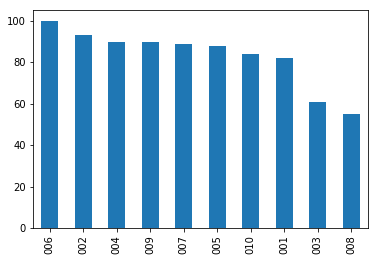

In [5]:
df['Category'].value_counts().plot.bar()

Getting the First 5 occurences of Image attribute from our DataFrame

In [6]:
df['Image'].head()

0    0050063.png
1    0070111.png
2    0040136.png
3    0100173.png
4    0060037.png
Name: Image, dtype: object

Reading the Images from the Folder and converting them to numpy arrays for better computation

In [7]:
X = []
folder_path = os.listdir("/kaggle/input/butterfly-dataset/leedsbutterfly/images/")
for file in folder_path:
    
    # Reading the Image
    img = cv2.imread("/kaggle/input/butterfly-dataset/leedsbutterfly/images/"+file,cv2.IMREAD_COLOR)
    # Resizing the current Image to a dimension of (128,128,3)
    img = cv2.resize(img,(128,128))
    
    # Converting them to Numpy arrays and appending to our List X
    X.append(np.array(img))
    
# Confirming if Images are converted to our desired dimensions 
print(X[1].shape)
    

(128, 128, 3)


Replacing the Category column values with their original names. 

In [8]:
df["Category"] = df["Category"].replace({'001': 'Danaus_plexippus', '002': 'Heliconius_charitonius', '003': 'Heliconius_erato', '004': 'Junonia_coenia', '005': 'Lycaena_phlaeas', '006': 'Nymphalis_antiopa', '007': 'Papilio_cresphontes', '008': 'Pieris_rapae', '009': 'Vanessa_atalanta', '010': 'Vanessa_cardui'}) 

Creating a numpy array y that has Category 

In [9]:
y = df['Category'].values
print(y[0:5])

['Lycaena_phlaeas' 'Papilio_cresphontes' 'Junonia_coenia' 'Vanessa_cardui'
 'Nymphalis_antiopa']


Plotting our first Image from list X

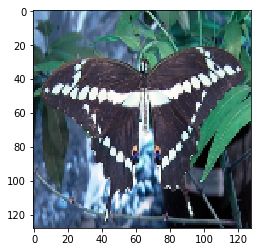

In [10]:
plt.imshow(X[1])

Plotting Some random Images

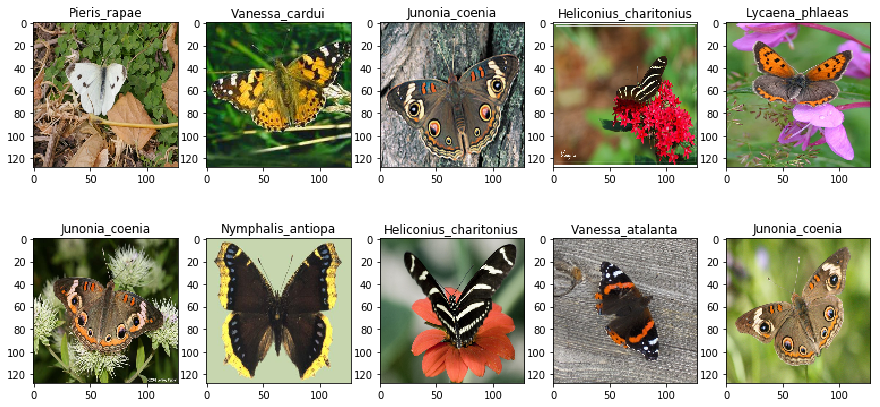

In [11]:
import random as rn
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')

In [12]:
df.head()

,Image,Category
0,0050063.png,Lycaena_phlaeas
1,0070111.png,Papilio_cresphontes
2,0040136.png,Junonia_coenia
3,0100173.png,Vanessa_cardui
4,0060037.png,Nymphalis_antiopa


In [13]:
print(X[0:5])

[array([[[ 29,  87,  68],
        [ 32, 106,  82],
        [ 31, 102,  82],
        ...,
        [ 88, 105, 131],
        [ 91, 105, 127],
        [103, 115, 133]],

       [[ 23,  60,  49],
        [ 32,  72,  65],
        [ 23,  66,  60],
        ...,
        [125, 137, 148],
        [117, 127, 141],
        [117, 126, 136]],

       [[ 43,  59,  66],
        [ 49,  68,  76],
        [ 47,  66,  70],
        ...,
        [126, 126, 132],
        [132, 133, 137],
        [140, 141, 145]],

       ...,

       [[ 63, 158, 123],
        [ 58, 154, 117],
        [ 63, 152, 117],
        ...,
        [  5,  22,  19],
        [  9,  15,  18],
        [  5,  10,  12]],

       [[ 59, 162, 125],
        [ 39, 144, 106],
        [ 50, 134,  95],
        ...,
        [  7,  20,  18],
        [  7,  17,  17],
        [  6,  16,  16]],

       [[ 97, 179, 150],
        [ 91, 180, 152],
        [103, 186, 151],
        ...,
        [ 23,  36,  34],
        [ 15,  26,  26],
        [  8,  20,  20]

In [14]:
print(y[0:5])

['Lycaena_phlaeas' 'Papilio_cresphontes' 'Junonia_coenia' 'Vanessa_cardui'
 'Nymphalis_antiopa']


Using LabelEncoder to convert our labels into numeric values

In [15]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['Category'] = enc.fit_transform(df['Category'])
print(df.head())

         Image  Category
0  0050063.png         4
1  0070111.png         6
2  0040136.png         3
3  0100173.png         9
4  0060037.png         5


Converting our LabelEncoded values to numpy array

In [16]:
Y = df['Category'].values
print(Y[0:5])
print(Y.ndim)

[4 6 3 9 5]
1


Using OneHotEncoder to encode our data so that we can use it in our model
Suppose we have the specie as 1 i.e 'Danaus_plexippus' OneHotEncoder will encode it as 
[1,0,0,0,0,0,0,0,0,0]
For 2 i.e 'Heliconius_charitonius it will be
[0,1,0,0,0,0,0,0,0,0]

In [17]:
Y = Y.reshape(len(Y),1)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
Y = ohe.fit_transform(Y)
print(type(Y))

<class 'scipy.sparse.csr.csr_matrix'>


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [18]:
Y.ndim
Y.shape
type(Y)

scipy.sparse.csr.csr_matrix

In [19]:
Y[1].shape

(1, 10)

In [20]:
X[1].shape

(128, 128, 3)

In [21]:
X = np.array(X)
type(X)

numpy.ndarray

Splitting Our Dataset into Training and Tesing data 

In [22]:
X_train , x_test , Y_train , y_test = train_test_split(X , Y ,test_size = 0.3)

In [23]:
X_train.shape

(582, 128, 128, 3)

In [24]:
Y_train.shape

(582, 10)

In [25]:
x_test.shape

(250, 128, 128, 3)

In [26]:
y_test.shape

(250, 10)

Creating our Model

In [27]:
model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

Will display the layers in our model, and Inputs to each layer

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)      

In [29]:
model.layers

Providing rules for our model, i.e loss type, optimizer to be used and metrics

In [30]:
model.compile(loss = "categorical_crossentropy" , optimizer = 'adam' , metrics = ['accuracy'])

Passing our data to the data

In [31]:
model.fit(X_train , Y_train , epochs = 30 , batch_size = 12)

Epoch 1/30
582/582 [==============================] - 12s 21ms/step - loss: 3.7259 - accuracy: 0.1615
Epoch 2/30
582/582 [==============================] - 11s 19ms/step - loss: 1.9438 - accuracy: 0.3093
Epoch 3/30
582/582 [==============================] - 11s 19ms/step - loss: 1.5460 - accuracy: 0.4399
Epoch 4/30
582/582 [==============================] - 11s 19ms/step - loss: 1.3002 - accuracy: 0.5412
Epoch 5/30
582/582 [==============================] - 11s 19ms/step - loss: 1.0711 - accuracy: 0.6100
Epoch 6/30
582/582 [==============================] - 12s 20ms/step - loss: 0.8305 - accuracy: 0.7148
Epoch 7/30
582/582 [==============================] - 11s 19ms/step - loss: 0.7502 - accuracy: 0.7440
Epoch 8/30
582/582 [==============================] - 11s 19ms/step - loss: 0.6734 - accuracy: 0.7526
Epoch 9/30
582/582 [==============================] - 11s 18ms/step - loss: 0.5792 - accuracy: 0.7990
Epoch 10/30
582/582 [==============================] - 11s 19ms/step - loss: 0.618

Evaluating our model on test data

In [32]:
loss,accuracy =  model.evaluate(x_test,y_test , batch_size = 32)

print('Test accuracy: {:2.2f}%'.format(accuracy*100))

250/250 [==============================] - 1s 5ms/step
Test accuracy: 81.60%
